### Практическое задание к уроку 1

<b>Оптимизировать x^2*(np.sin(0,5*_x)^2+1)</b>  
Какие параметры шага и количества итераций оптимальны? При каких значениях шага оптимизиция не выходит из локальных минимумов?

In [63]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

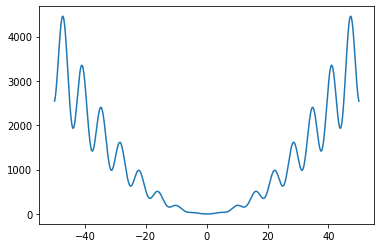

In [17]:
x = np.linspace(-50, 50, 5000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
plt.plot(x, func2(x))
plt.show()

In [22]:
def func1(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
def grad1(_x): return (2*_x * (np.sin(0.5*_x)**2 + 1) + _x**2 * np.sin(0.5*_x) * np.cos(0.5*_x))

In [23]:
def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [62]:
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad -30.89234940931316
method1 -29.330856116484938
method2 -30.893919153010074


In [39]:
x0=np.random.uniform(-50, 50)
alpha=0.09
n_iter=100
for x in range(n_iter):
    print(x0, func1(x0))
    x0-=alpha*grad1(x0)

-7.311599188051886 66.39192026742438
-3.6167179503569753 25.43686112853212
-2.6200222202486723 13.272672240698768
-1.5542582910750338 3.6036035414339844
-1.0282293593128362 1.3129338523506286
-0.7576456429685847 0.6525377396076276
-0.5848654325674291 0.3704957180163675
-0.46234222035936956 0.2249816540638364
-0.37046130300558433 0.1418967816644101
-0.2992804481792726 0.09155950293004333
-0.24302431462225219 0.059928579004748045
-0.19799766043419545 0.039586040202369784
-0.16166290844265127 0.026305282591115517
-0.1321845718214611 0.01754897430372567
-0.10818393589256169 0.011737975121937277
-0.08859703972429119 0.007864828784084064
-0.0725870446568617 0.005275816276880929
-0.05948697857082619 0.0035418302969252445
-0.04876038521239523 0.0023789881019986737
-0.039973085141452126 0.0015984857299277614
-0.032772182583435706 0.0010743043030386973
-0.026870022337464515 0.0007221284128893635
-0.022031672464835065 0.00048545349119263973
-0.018065009014641156 0.0003263711751664347
-0.014812776

In [67]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0, show_process=False):
        for i in range(self.n_iter):
            if show_process:
                print(f'x: {x0:.4f}, function: {func(x0):.4f}')
            x0-=self.alpha*grad(x0)
        return x0

In [68]:
x0=np.random.uniform(-50, 50)
for alpha in np.linspace(0.001, 0.1, 30):
    opt1=optimizer(alpha, 100)
    x=opt1.fit(func1, grad1, np.random.uniform(-50, 50))
    print(f'{alpha:.4f}. x: {x:.4f}, function: {func1(x):.4f}')

0.0010. x: 5.7480, function: 35.3492
0.0044. x: -12.2228, function: 153.7624
0.0078. x: -24.0594, function: 730.1677
0.0112. x: -12.2228, function: 153.7624
0.0147. x: -0.4223, function: 0.1862
0.0181. x: 0.2460, function: 0.0614
0.0215. x: -12.2228, function: 153.7624
0.0249. x: -12.2228, function: 153.7624
0.0283. x: 12.2228, function: 153.7624
0.0317. x: 12.3861, function: 154.6584
0.0351. x: nan, function: nan
0.0386. x: nan, function: nan
0.0420. x: -12.4896, function: 156.2205
0.0454. x: -0.0005, function: 0.0000
0.0488. x: -0.0057, function: 0.0000
0.0522. x: 0.0005, function: 0.0000
0.0556. x: -0.0001, function: 0.0000
0.0590. x: -0.0000, function: 0.0000
0.0624. x: nan, function: nan
0.0659. x: nan, function: nan
0.0693. x: 0.0000, function: 0.0000
0.0727. x: -0.0000, function: 0.0000
0.0761. x: 0.0000, function: 0.0000
0.0795. x: -0.0000, function: 0.0000
0.0829. x: 0.0000, function: 0.0000
0.0863. x: -0.0000, function: 0.0000
0.0898. x: nan, function: nan
0.0932. x: 0.0000, 

In [69]:
alpha = 0.06
opt1=optimizer(alpha, 100)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50), True)

x: 20.0742, function: 536.0953
x: 5.4975, function: 34.6515
x: 5.3824, function: 34.4602
x: 5.2953, function: 34.3429
x: 5.2194, function: 34.2492
x: 5.1464, function: 34.1594
x: 5.0708, function: 34.0596
x: 4.9871, function: 33.9334
x: 4.8888, function: 33.7533
x: 4.7661, function: 33.4639
x: 4.6041, function: 32.9421
x: 4.3777, function: 31.8939
x: 4.0465, function: 29.6186
x: 3.5544, function: 24.7366
x: 2.8713, function: 16.3388
x: 2.1224, function: 7.9370
x: 1.5585, function: 3.6286
x: 1.2063, function: 1.9233
x: 0.9742, function: 1.1569
x: 0.8081, function: 0.7540
x: 0.6820, function: 0.5171
x: 0.5822, function: 0.3669
x: 0.5010, function: 0.2664
x: 0.4336, function: 0.1967
x: 0.3768, function: 0.1469
x: 0.3284, function: 0.1107
x: 0.2869, function: 0.0840
x: 0.2511, function: 0.0640
x: 0.2200, function: 0.0490
x: 0.1930, function: 0.0376
x: 0.1694, function: 0.0289
x: 0.1488, function: 0.0223
x: 0.1307, function: 0.0172
x: 0.1149, function: 0.0132
x: 0.1010, function: 0.0102
x: 

In [70]:
alpha = 0.006
opt1=optimizer(alpha, 100)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50), True)

x: 36.6633, function: 1673.6220
x: 39.5846, function: 2592.9388
x: 34.3286, function: 2341.5469
x: 32.7080, function: 1457.5721
x: 29.0877, function: 1559.8067
x: 30.2884, function: 1179.3422
x: 32.3073, function: 1237.7368
x: 29.4116, function: 1479.2580
x: 31.1631, function: 986.5761
x: 31.5120, function: 995.2944
x: 30.8472, function: 1026.4341
x: 31.9852, function: 1103.7391
x: 29.9167, function: 1310.5143
x: 32.0692, function: 1134.3055
x: 29.7696, function: 1362.7923
x: 31.8713, function: 1067.5422
x: 30.1291, function: 1234.4809
x: 32.2516, function: 1211.4613
x: 29.4862, function: 1456.8689
x: 31.3353, function: 983.4963
x: 31.1959, function: 984.9160
x: 31.4543, function: 989.7358
x: 30.9629, function: 1007.0587
x: 31.8315, function: 1056.3604
x: 30.2061, function: 1207.4835
x: 32.2872, function: 1228.1129
x: 29.4378, function: 1471.5292
x: 31.2250, function: 983.8594
x: 31.4020, function: 986.1328
x: 31.0664, function: 994.3016
x: 31.6739, function: 1019.8341
x: 30.5197, func